### XGBoost Classifier Model for NBA MVP Prediction

##### Data Preparation
- Loading the dataset.
- Checking for NaN values for other features since there are players who did not play, but was included in a lineup. Therefore, there stats are 0. 
- Dropping features that are object-type data that are identifiers with no predictive value. (e.g. Player's Names & Team Names)
- One-Hot Encode the 'Position' feature because it can add predictive value to the model since it is relevant to player's performance and MVP candidacy. 
- Compute Pearson Correlation Matrix to identify the strong positive and strong negative relationship among the features.
- Dropping redundant features and features that are less related to the target variable (MVP) based on the results of Pearson Correlation Matrix.
- Defining target variable based on MVP classification. (1 = MVP candidate, 0 = Non-MVP)
- Splitting datasets into 70% for training and 30% for testing.
- Standardizing the data on all features before model training using StandardScaler to have a mean of 0 and a standard deviation of 1, making the model less sensitive to different scales of the features.
- Apply SVM-SMOTE for oversampling on scaled training dataset to generate synthetic samples for the minority class (MVP class). 
- Apply EasyEnsemble for undersampling on scaled training dataset to reduce redundancy in the majority class (Non-MVP class).

In [218]:
import pandas as pd

# Load dataset
data = pd.read_csv("player_mvp_stats.csv")
data

,Unnamed: 0,Player,Age,Tm,Pos,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,27,LAL,PF,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,1,Byron Scott,29,LAL,SG,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,2,Elden Campbell,22,LAL,PF,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,3,Irving Thomas,25,LAL,PF,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,4,James Worthy,29,LAL,SF,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15802,15802,Spencer Hawes,28,MIL,PF,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
15803,15803,Steve Novak,33,MIL,PF,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
15804,15804,Terrence Jones,25,MIL,PF,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
15805,15805,Thon Maker,19,MIL,C,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [219]:
del data["Unnamed: 0"]
data

,Player,Age,Tm,Pos,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,27,LAL,PF,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,29,LAL,SG,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,22,LAL,PF,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,25,LAL,PF,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,29,LAL,SF,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15802,Spencer Hawes,28,MIL,PF,54,1,14.8,2.5,5.1,0.484,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
15803,Steve Novak,33,MIL,PF,8,0,2.8,0.3,0.9,0.286,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
15804,Terrence Jones,25,MIL,PF,54,12,23.5,4.3,9.1,0.470,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
15805,Thon Maker,19,MIL,C,57,34,9.9,1.5,3.2,0.459,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [220]:
# Checking for NaN values for each column
pd.isnull(data).sum()

Player        0
Age           0
Tm            0
Pos           0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          65
3P            0
3PA           0
3P%        2134
2P            0
2PA           0
2P%         110
eFG%         65
FT            0
FTA           0
FT%         580
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [221]:
# Changing NaN values to 0
data = data.fillna(0)
pd.isnull(data).sum()

Player     0
Age        0
Tm         0
Pos        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [222]:
# Checking for dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   15807 non-null  object 
 1   Age      15807 non-null  int64  
 2   Tm       15807 non-null  object 
 3   Pos      15807 non-null  object 
 4   G        15807 non-null  int64  
 5   GS       15807 non-null  int64  
 6   MP       15807 non-null  float64
 7   FG       15807 non-null  float64
 8   FGA      15807 non-null  float64
 9   FG%      15807 non-null  float64
 10  3P       15807 non-null  float64
 11  3PA      15807 non-null  float64
 12  3P%      15807 non-null  float64
 13  2P       15807 non-null  float64
 14  2PA      15807 non-null  float64
 15  2P%      15807 non-null  float64
 16  eFG%     15807 non-null  float64
 17  FT       15807 non-null  float64
 18  FTA      15807 non-null  float64
 19  FT%      15807 non-null  float64
 20  ORB      15807 non-null  float64
 21  DRB      158

In [223]:
# 'Player', 'Tm', and 'Team' are object-type data that are identifiers with no predictive value 
# 'Pos' is a categorical variable that can add predictive value since positions are relevant to player performance and MVP candicacy

# Drop irrelevant categorical variables ('Player', 'Tm', 'Team')
data = data.drop(["Player", "Tm", "Team"], axis=1)

# Display the remaining columns
print("\nColumns after dropping irrelevant categorical variables:")
print(data.columns)


Columns after dropping irrelevant categorical variables:
Index(['Age', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Pts Won', 'Pts Max',
       'Share', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')


In [224]:
# One-Hot Encode the 'Pos' Column
data = pd.get_dummies(data, columns=['Pos'])

# Display the encoded dataset
print("\nDataset after One-Hot Encoding:")
print(data.head())


Dataset after One-Hot Encoding:
   Age   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%  ...   W/L%   GB  \
0   27  82  21  26.4  3.1   6.6  0.476  0.1  0.7  0.200  ...  0.707  5.0   
1   29  82  82  32.1  6.1  12.8  0.477  0.9  2.7  0.324  ...  0.707  5.0   
2   22  52   0   7.3  1.1   2.4  0.455  0.0  0.0  0.000  ...  0.707  5.0   
3   25  26   0   4.2  0.7   1.9  0.340  0.0  0.0  0.000  ...  0.707  5.0   
4   29  78  74  38.6  9.2  18.7  0.492  0.3  1.2  0.289  ...  0.707  5.0   

    PS/G  PA/G   SRS  Pos_C  Pos_PF  Pos_PG  Pos_SF  Pos_SG  
0  106.3  99.6  6.73  False    True   False   False   False  
1  106.3  99.6  6.73  False   False   False   False    True  
2  106.3  99.6  6.73  False    True   False   False   False  
3  106.3  99.6  6.73  False    True   False   False   False  
4  106.3  99.6  6.73  False   False   False    True   False  

[5 rows x 42 columns]


In [225]:
# 'Pos' columns turn into boolean data types after one-hot encoding
# Convert these boolean columns to numeric
bool_cols = data.select_dtypes(include="bool").columns
data[bool_cols] = data[bool_cols].astype(int)

In [226]:
# Checking if 'Pos' columns are converted to int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      15807 non-null  int64  
 1   G        15807 non-null  int64  
 2   GS       15807 non-null  int64  
 3   MP       15807 non-null  float64
 4   FG       15807 non-null  float64
 5   FGA      15807 non-null  float64
 6   FG%      15807 non-null  float64
 7   3P       15807 non-null  float64
 8   3PA      15807 non-null  float64
 9   3P%      15807 non-null  float64
 10  2P       15807 non-null  float64
 11  2PA      15807 non-null  float64
 12  2P%      15807 non-null  float64
 13  eFG%     15807 non-null  float64
 14  FT       15807 non-null  float64
 15  FTA      15807 non-null  float64
 16  FT%      15807 non-null  float64
 17  ORB      15807 non-null  float64
 18  DRB      15807 non-null  float64
 19  TRB      15807 non-null  float64
 20  AST      15807 non-null  float64
 21  STL      158

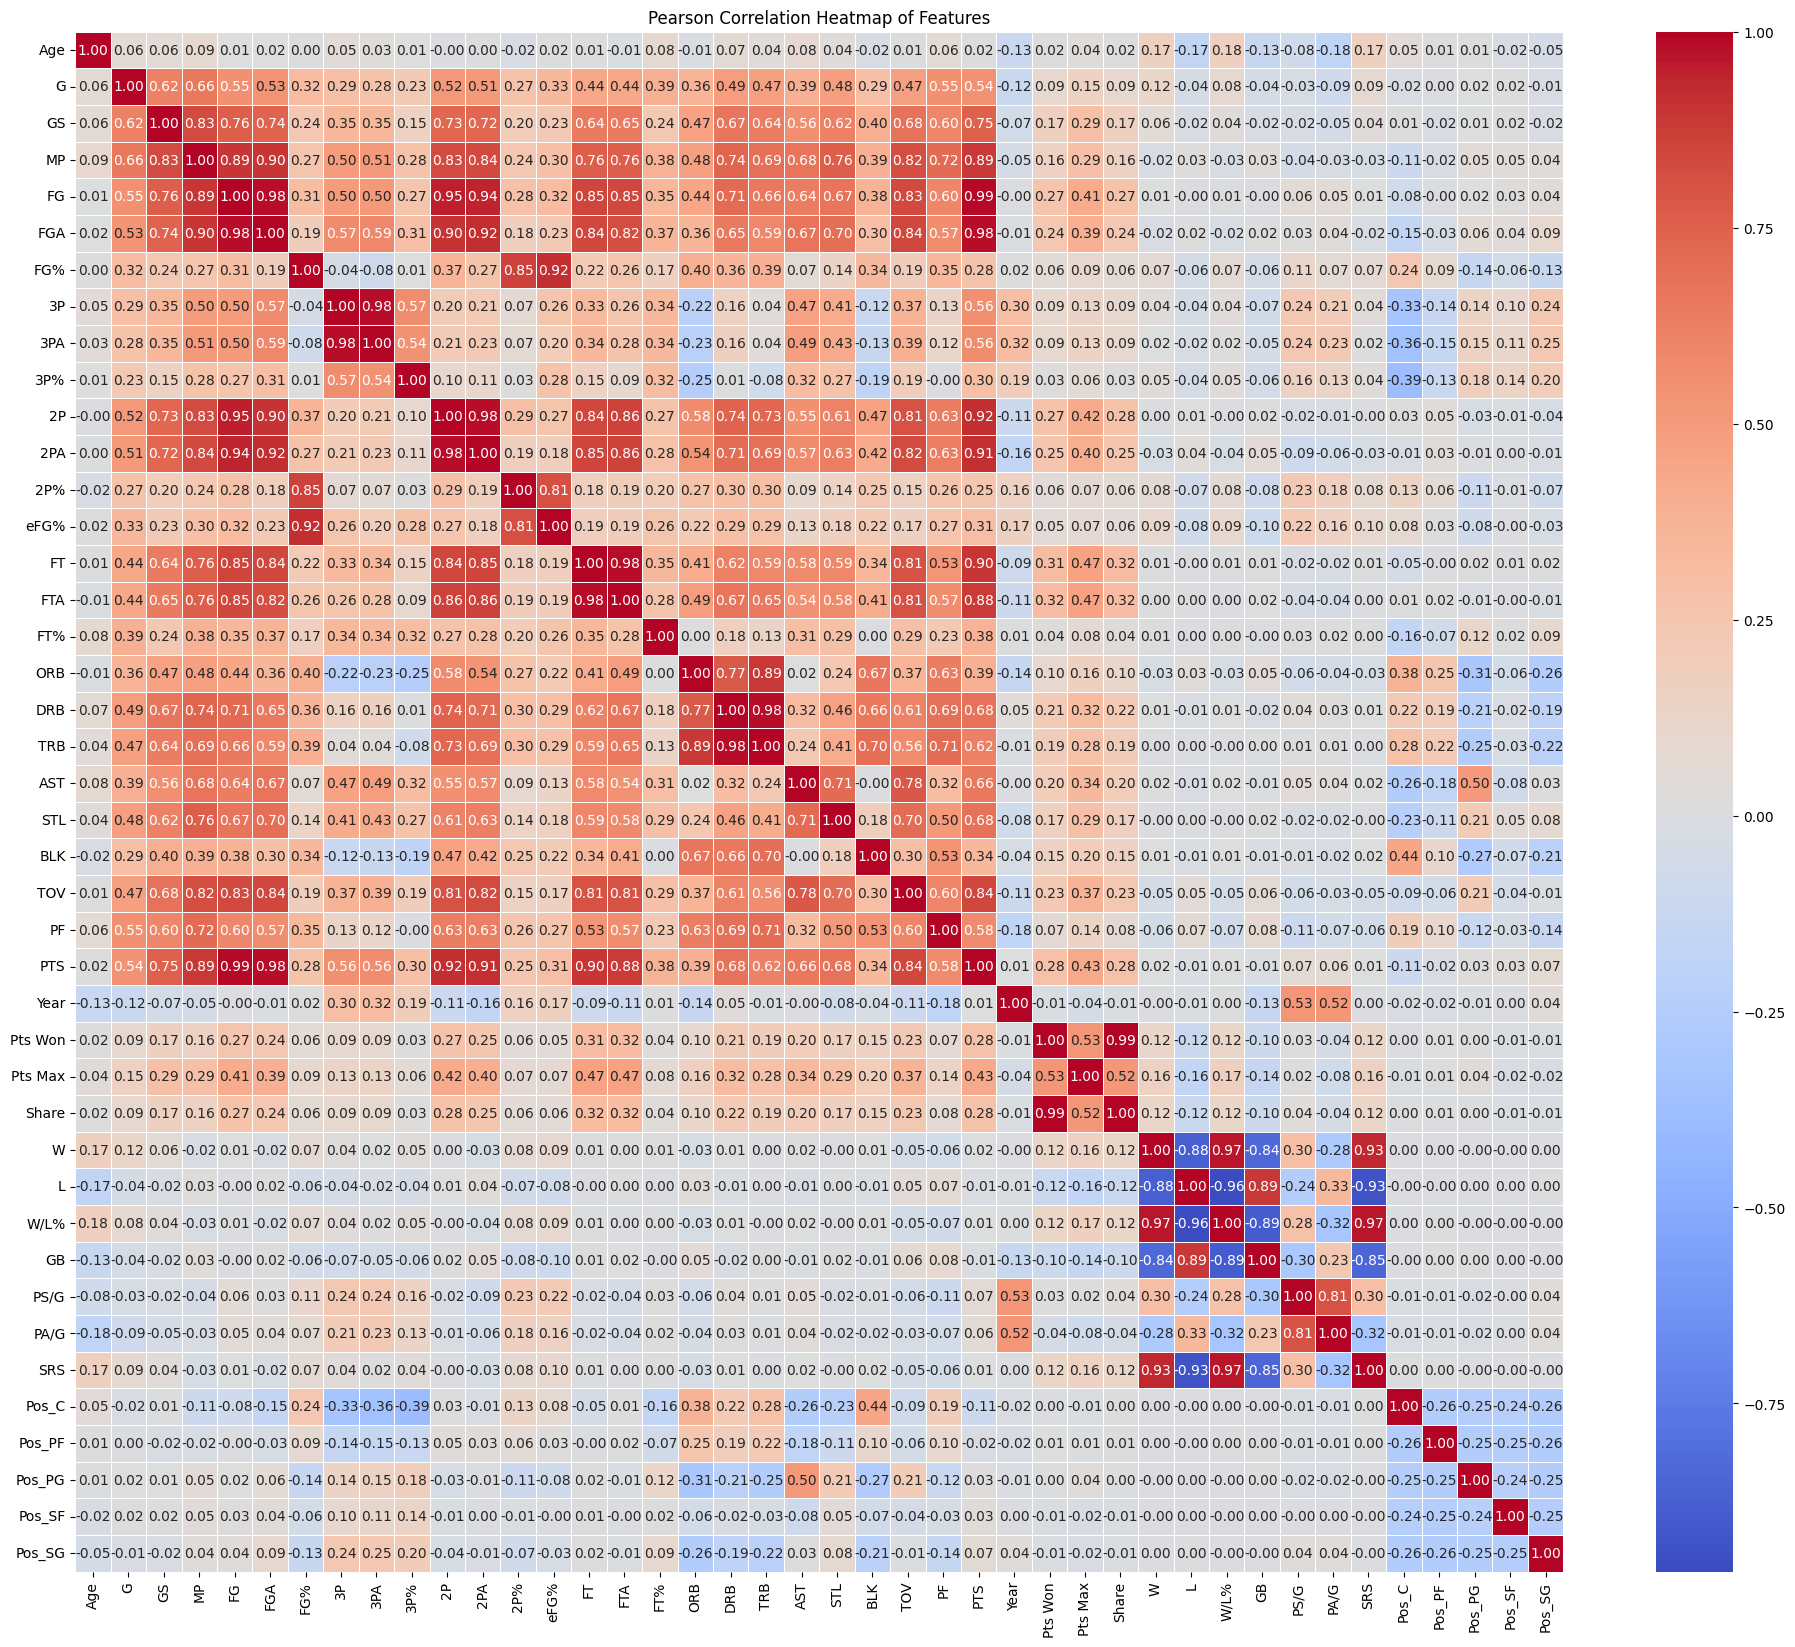

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Pearson Correlation Matrix
correlation_matrix = pd.DataFrame(data).corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(24,20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Correlation Heatmap of Features")
plt.show()

In [228]:
# Set Pandas options to display all columns and rows 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Compute the Pearson Correlation matrix
correlation_matrix = data.corr()

# Set threshold values for strong correlation 
strong_positive_threshold = 0.85
strong_negative_threshold = -0.85

# Extract strong positive correlations
strong_positive_corr = (correlation_matrix >= strong_positive_threshold) & (correlation_matrix < 1.0)

# Extract strong negative correlations 
strong_negative_corr = (correlation_matrix <= strong_negative_threshold)

# Display strong correlations 
print("Strong Positive Correlations (>= 0.85):")
print(correlation_matrix[strong_positive_corr])

print("\nStrong Negative Correlations (<= -0.85):")
print(correlation_matrix[strong_negative_corr])

# Reset Pandas display settings
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

Strong Positive Correlations (>= 0.85):
         Age   G  GS        MP        FG       FGA       FG%        3P  \
Age      NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
G        NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
GS       NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
MP       NaN NaN NaN       NaN  0.894108  0.899257       NaN       NaN   
FG       NaN NaN NaN  0.894108       NaN  0.981078       NaN       NaN   
FGA      NaN NaN NaN  0.899257  0.981078       NaN       NaN       NaN   
FG%      NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
3P       NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
3PA      NaN NaN NaN       NaN       NaN       NaN       NaN  0.984042   
3P%      NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
2P       NaN NaN NaN       NaN  0.950042  0.902869       NaN       NaN   
2PA      NaN NaN NaN       NaN  0.939012  0.920875       NaN       NaN  

In [229]:
# List and drop features that are less related to the target and redundant to other features (based on the Pearson Correlation Heatmap)
features_to_drop = [
    "FG", "FGA", "FG%", "2P", "2PA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "W", 
    "L", "Year", "Pts Max", "W/L%"]

# Drop features from the dataset
data = data.drop(columns=features_to_drop)

In [230]:
import numpy as np

# Define target variable based on MVP classification criteria
# Created the MVP column to represent the target variable
data["MVP"] = np.where((data["Pts Won"] > 0) | (data["Share"] > 0), 1, 0) # 1 if player received any votes (MVP candidate), 0 if player did not receive any votes (Non-MVP)

In [231]:
data["MVP"].value_counts()

MVP
0    15299
1      508
Name: count, dtype: int64

In [232]:
# Checking for final features after dropping redundant features and defining target variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15807 entries, 0 to 15806
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      15807 non-null  int64  
 1   G        15807 non-null  int64  
 2   GS       15807 non-null  int64  
 3   MP       15807 non-null  float64
 4   3P%      15807 non-null  float64
 5   2P%      15807 non-null  float64
 6   eFG%     15807 non-null  float64
 7   FT%      15807 non-null  float64
 8   TRB      15807 non-null  float64
 9   AST      15807 non-null  float64
 10  STL      15807 non-null  float64
 11  BLK      15807 non-null  float64
 12  TOV      15807 non-null  float64
 13  PF       15807 non-null  float64
 14  PTS      15807 non-null  float64
 15  Pts Won  15807 non-null  float64
 16  Share    15807 non-null  float64
 17  GB       15807 non-null  float64
 18  PS/G     15807 non-null  float64
 19  PA/G     15807 non-null  float64
 20  SRS      15807 non-null  float64
 21  Pos_C    158

In [233]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%) and testing (30%) sets
# Features (X) and target variable (y)
X = data.drop(columns=["MVP", "Pts Won", "Share"])      # Features
y = data["MVP"]                                         # Target variable

# stratify=y maintains the class distribution in both training and testing sets
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=8)

In [234]:
# Display the shape of the splits
print("\nDataset Splits")
print(f"Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Testing Set Shape: {X_test.shape}, {y_test.shape}")


Dataset Splits
Training Set Shape: (11064, 24), (11064,)
Testing Set Shape: (4743, 24), (4743,)


In [235]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features with z-score normalization
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both sets
X_train_scaled = scaler.fit_transform(X_train)  # Fits the scaler on training set and transform it
X_test_scaled = scaler.transform(X_test)        # Uses the same scaler to transform the test set

In [236]:
# Convert the scaled data back into DataFrames with the original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [237]:
# Display confirmation
print("\nStandardization Applied")
print("Training Set (first 5 rows):")
print(X_train_scaled_df.head())

print("\nTesting Set (first 5 rows):")
print(X_test_scaled_df.head())


Standardization Applied
Training Set (first 5 rows):
        Age         G        GS        MP       3P%       2P%      eFG%  \
0 -0.854880  1.076134 -0.733632 -0.232756 -1.372841 -0.202248 -0.331663   
1 -1.090544  0.799446 -0.317293  0.620623  0.633068 -0.130794  0.109349   
2  1.030435 -0.267782 -0.005039  0.799238 -1.056416 -0.264771 -0.542581   
3  0.794771  0.562284  1.417451  0.362625 -1.372841  0.199681  0.118936   
4 -0.854880  1.036607  1.833789  1.672463 -0.242751 -0.112931 -0.216616   

        FT%       TRB       AST  ...       PTS        GB      PS/G      PA/G  \
0 -0.538506  0.385010 -0.684826  ... -0.312255  0.817366 -0.492946 -0.660661   
1  0.021677  0.385010 -0.306879  ...  0.301635  0.280278 -1.311668 -1.287510   
2  0.521299 -0.378833  2.554716  ...  0.135719 -0.333537 -0.677819 -0.203584   
3 -0.134771  0.666425 -0.738818  ... -0.362030 -0.870626 -0.955128 -1.065501   
4  0.344665  1.832290  1.312892  ...  1.463050  0.970820  0.299365  1.063174   

        SRS   

In [238]:
# Display the shape of the scaled datasets
print("\nScaled Training Set Shape:", X_train_scaled_df.shape)
print("Scaled Testing Set Shape:", X_test_scaled_df.shape)


Scaled Training Set Shape: (11064, 24)
Scaled Testing Set Shape: (4743, 24)


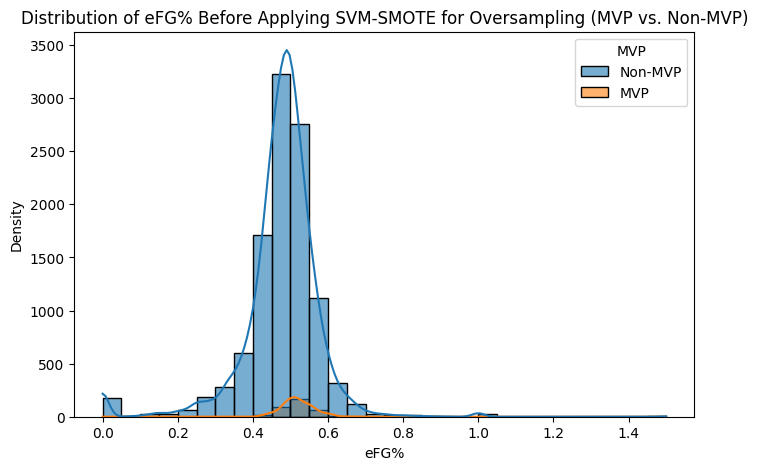

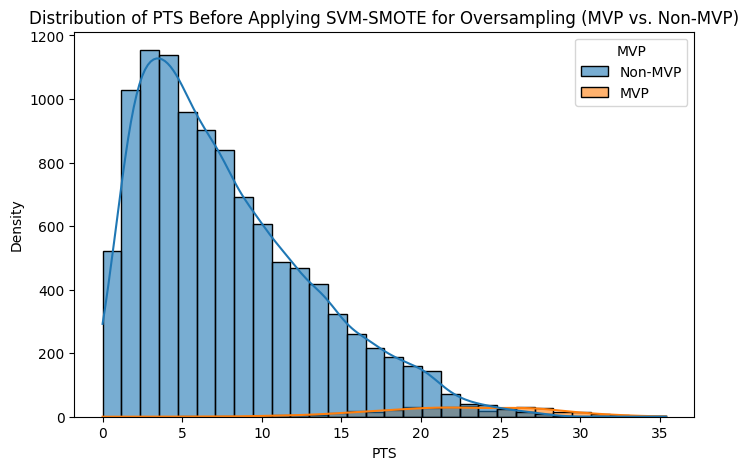

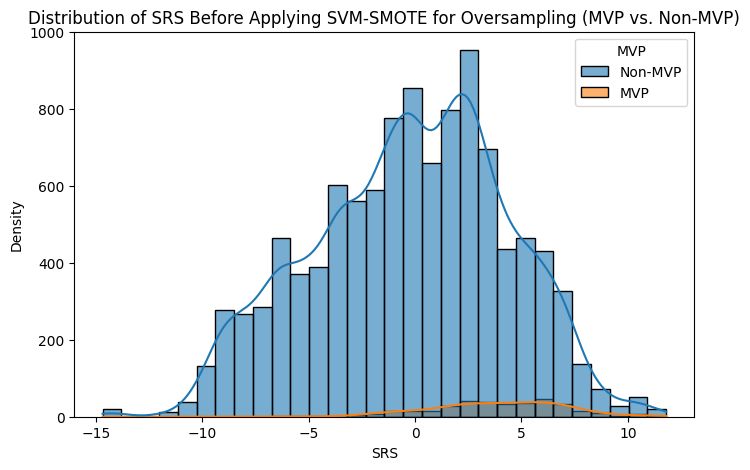

In [239]:
# Visualize key feature distributions before oversampling
key_features = ["eFG%", "PTS", "SRS"] # Key features to visualize based on my judgement

# Convert y_train to a DataFrame to map categorical labels
y_train_labels = y_train.map({0: "Non-MVP", 1: "MVP"})

# Visualize key feature distributions before oversampling
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=X_train, x=feature, hue=y_train_labels, kde=True, bins=30, alpha=0.6)
    plt.title(f"Distribution of {feature} Before Applying SVM-SMOTE for Oversampling (MVP vs. Non-MVP)")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

In [240]:
from imblearn.over_sampling import SVMSMOTE

# Apply SVM-SMOTE for oversampling (scaled training set)
svm_smote = SVMSMOTE(random_state=8)
X_resampled, y_resampled = svm_smote.fit_resample(X_train_scaled_df, y_train)

In [241]:
from collections import Counter

# Check class distribution before and after oversampling
# 1 - MVP, 0 - Non-MVP
print("Class distribution before oversampling:", Counter(y_train))
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution before oversampling: Counter({0: 10708, 1: 356})
Class distribution after oversampling: Counter({0: 10708, 1: 10708})


In [242]:
# Display the shape of the resampled dataset (after oversampling)
print("\nResampled Training Set Shape (after oversampling):", X_resampled.shape, y_resampled.shape)


Resampled Training Set Shape (after oversampling): (21416, 24) (21416,)


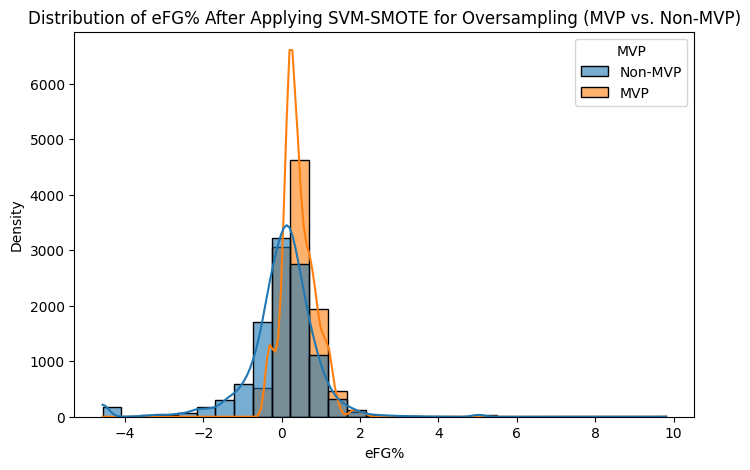

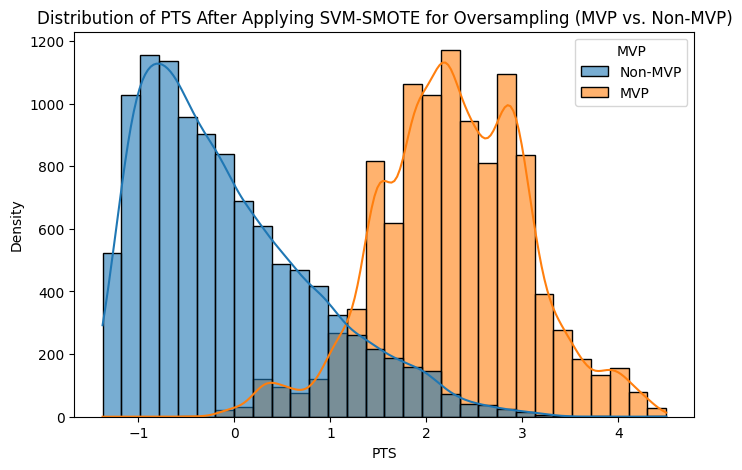

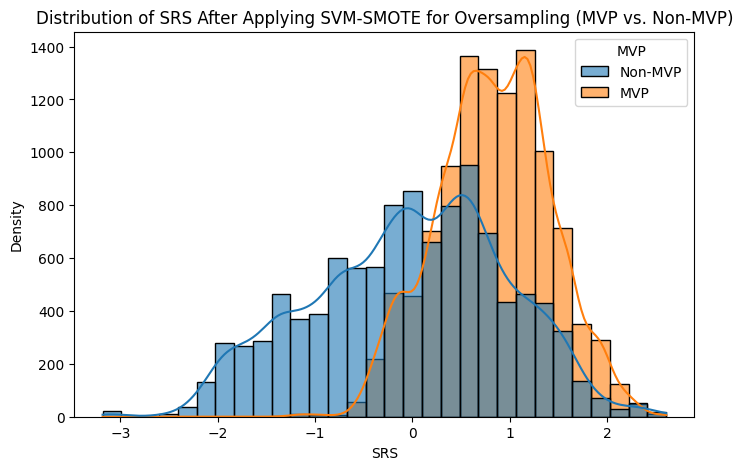

In [243]:
# Convert y_resampled to a DataFrame to map categorical labels
y_resampled_labels = y_resampled.map({0: "Non-MVP", 1: "MVP"})

# Visualize key feature distributions after oversampling
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=X_resampled, x=feature, hue=y_resampled_labels, kde=True, bins=30, alpha=0.6)
    plt.title(f"Distribution of {feature} After Applying SVM-SMOTE for Oversampling (MVP vs. Non-MVP)")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

- SVM-SMOTE successfully oversampled the minority class (MVP) without distorting feature distributions since the general shape of each feature's distribution has remained similar before and after oversampling.
- The counter for class distribution also shows equal distribution after oversampling.  
`0 - 10708 (Non-MVP) : 1 - 10708 (MVP)`
- This means that the dataset is more balanced  and can proceed to undersampling to refine the balance by reducing redundancy in the majority class (Non-MVP). 

In [244]:
from imblearn.ensemble import EasyEnsembleClassifier

# Apply EasyEnsemble for undersampling
# n_estimators is the number of weak classifiers (decision trees) that the ensemble will create
easy_ensemble = EasyEnsembleClassifier(n_estimators=10, random_state=8)
easy_ensemble.fit(X_resampled, y_resampled)

# Extract one of the balanced dataset from the ensemble (first estimator)
X_balanced, y_balanced = X_resampled, y_resampled   # Extract the balanced dataset

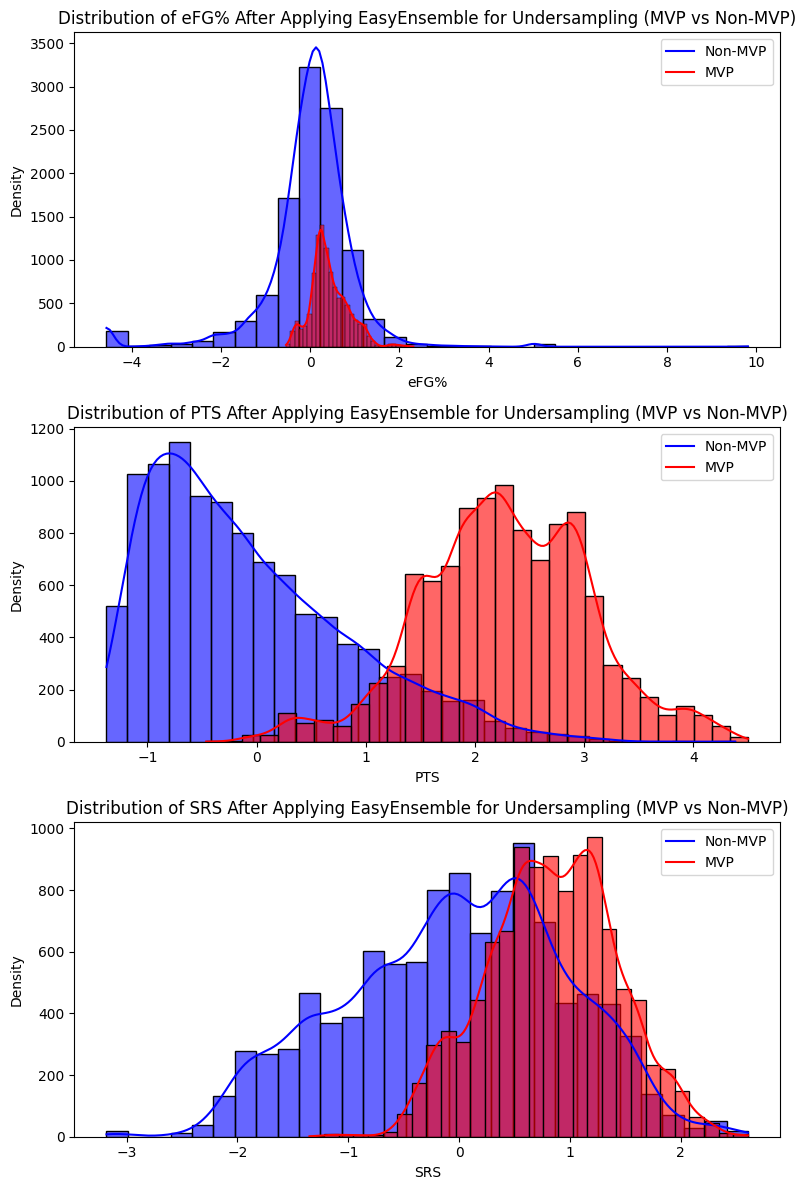

In [245]:
# Convert to DataFrame for visualization
data_balanced = pd.DataFrame(X_balanced, columns=X_balanced.columns)
data_balanced['MVP'] = y_balanced # Add target variable for class distinction

# Plot data distribution for visualization after undersampling
fig, axes = plt.subplots(len(key_features), 1, figsize=(8, 12))

for i, feature in enumerate(key_features):
    sns.histplot(data_balanced[data_balanced['MVP'] == 0][feature], color='blue', label='Non-MVP', kde=True, ax=axes[i], bins=30, alpha=0.6)
    sns.histplot(data_balanced[data_balanced['MVP'] == 1][feature], color='red', label='MVP', kde=True, ax=axes[i], bins=30, alpha=0.6)
    axes[i].set_title(f"Distribution of {feature} After Applying EasyEnsemble for Undersampling (MVP vs Non-MVP)")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].legend(["Non-MVP", "MVP"])

plt.tight_layout()
plt.show()

In [246]:
# Check class distribution after undersampling
# Assuming the class distribution is balanced after oversampling (0: 10708, 1: 10708)
resampled_class_distribution = Counter(y_balanced)
print("Class distribution after undersampling:", resampled_class_distribution)

Class distribution after undersampling: Counter({0: 10708, 1: 10708})


- EasyEnsemble successfully undersampled since the Non-MVP feature distributions still resemble the original distribution from the data distribution after applying SVM-SMOTE for oversampling. 
- The graph after applying EasyEnsemble for undersampling and the graph after applying SVM-SMOTE for oversampling appears to be the same and therefore, equal. 
- The counter for class distribution still shows equal distribution after undersampling.   
`0 - 10708 : 1 - 10708`
- EasyEnsemble removes excess samples from the majority class (Non-MVP), ensuring that the dataset remains balanced and not overly redundant. This prevents the model from overfitting to synthetic samples and retains a more representative subset of the majority class.

##### Model Training
- Checking the dataset structure and class distribution for training and testing datasets to confirm if it is correct before model training.
- Splitting the scaled training dataset into 80% training set and 20% validation set for early stopping purposes in model training.
- Building the XGBoost Classifier model with parameters. 

In [247]:
# Checking the dataset structure before model training
print("Original Training Set Size:", X_train_scaled_df.shape, y_train.shape)
print("Resampled Training Set Size:", X_balanced.shape, y_balanced.shape)
print("Testing Set Size (Unchanged):", X_test_scaled_df.shape, y_test.shape)

Original Training Set Size: (11064, 24) (11064,)
Resampled Training Set Size: (21416, 24) (21416,)
Testing Set Size (Unchanged): (4743, 24) (4743,)


In [248]:
# Checking the class distribution before model training 
print("Class Distribution Before Resampling:", Counter(y_train))
print("Class Distribution After Resampling:", Counter(y_balanced))
print("Class Distribution in Test Set (Unchanged):", Counter(y_test))

Class Distribution Before Resampling: Counter({0: 10708, 1: 356})
Class Distribution After Resampling: Counter({0: 10708, 1: 10708})
Class Distribution in Test Set (Unchanged): Counter({0: 4591, 1: 152})


In [249]:
# Split the balanced dataset into training (80%) and validation (20%)  for early stopping
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=8)

In [250]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier 
xgb_classifier = XGBClassifier(
    objective = "binary:logistic",
    eval_metric = "auc",
    n_estimators = 300,         # Number of boosting rounds (trees)
    max_depth = 5,              # Depth of each tree
    learning_rate = 0.05,       # Step size shrinkage to prevent overfitting
    subsample = 0.8,            # Percentage of training data used in each boosting round
    colsample_bytree = 0.8,     # Percentage of features used for each tree
    reg_alpha = 0.1,            # L1 regularization (reduces overfitting)
    reg_lambda = 1.0,           # L2 regularization (reduces overfitting)
    early_stopping_rounds = 10, # Stops training when no improvement after 10 rounds
    random_state = 8            # Reproducibility
)

In [251]:
# Train the model with early stopping
# Early stopping is used to prevent overfitting by halting the training process once the model's performance on the validation set stops improving.
xgb_classifier.fit(
    X_train_final, y_train_final,
    eval_set=[(X_train_final, y_train_final), (X_val_final, y_val_final)],
    verbose = 10
)

[0]	validation_0-auc:0.98210	validation_1-auc:0.97973
[10]	validation_0-auc:0.99317	validation_1-auc:0.99051
[20]	validation_0-auc:0.99471	validation_1-auc:0.99218
[30]	validation_0-auc:0.99618	validation_1-auc:0.99291
[40]	validation_0-auc:0.99754	validation_1-auc:0.99445
[50]	validation_0-auc:0.99801	validation_1-auc:0.99503
[60]	validation_0-auc:0.99847	validation_1-auc:0.99568
[70]	validation_0-auc:0.99887	validation_1-auc:0.99626
[80]	validation_0-auc:0.99915	validation_1-auc:0.99666
[90]	validation_0-auc:0.99940	validation_1-auc:0.99714
[100]	validation_0-auc:0.99957	validation_1-auc:0.99744
[110]	validation_0-auc:0.99970	validation_1-auc:0.99773
[120]	validation_0-auc:0.99977	validation_1-auc:0.99797
[130]	validation_0-auc:0.99983	validation_1-auc:0.99818
[140]	validation_0-auc:0.99987	validation_1-auc:0.99837
[150]	validation_0-auc:0.99989	validation_1-auc:0.99852
[160]	validation_0-auc:0.99992	validation_1-auc:0.99866
[170]	validation_0-auc:0.99994	validation_1-auc:0.99875
[18

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

##### Initial Model Performance (before optimizing the model's algorithm)
`Initial Training Set Accuracy Score = 0.9992`  
`Initial Validation Set Accuracy Score = 0.9900`

In [252]:
# Display initial model performance 
train_score = xgb_classifier.score(X_train_final, y_train_final)
val_score = xgb_classifier.score(X_val_final, y_val_final)

# Display initial training performance
print("\nInitial Model Performance")
print(f"Initial Training Accuracy: {train_score:.4f}")
print(f"Initial Validation Accuracy: {val_score:.4f}")


Initial Model Performance
Initial Training Accuracy: 0.9992
Initial Validation Accuracy: 0.9900


##### Initial Evaluation of Model (based on handling class imbalance datasets)
- Below are the initial AUC and G-mean scores of the XGBoost Classifier model for handling class imbalance datasets (before optimizing the model's algorithm):  
`AUC = 0.9887`  
`G-Mean = 0.9177`

In [253]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# Calculate the AUC and G-mean scores for evaluating the effectiveness of the model in handling class imbalance datasets 
# Predict probabilities for AUC calculation
y_probs = xgb_classifier.predict_proba(X_test_scaled_df)[:, 1] # Get probabilities for the positive class

# Predict class labels 
y_pred = xgb_classifier.predict(X_test_scaled_df)

# Compute AUC (AUC-ROC)
auc_score = roc_auc_score(y_test, y_probs)

# Compute G-Mean
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn) # Recall / True Positive Rate (TPR)
specificity = tn / (tn + fp) # True Negative Rate (TNR)

g_mean = np.sqrt(sensitivity * specificity)


In [254]:
# Print the AUC and G-mean scores
print("\nInitial Evaluation of Model (based on handling class imbalance datasets)")
print(f"AUC: {auc_score:.4f}")
print(f"G-Mean: {g_mean:.4f}")


Initial Evaluation of Model (based on handling class imbalance datasets)
AUC: 0.9887
G-Mean: 0.9177


##### Initial Evaluation of Model based on predicting the NBA MVP
- Below are the initial Accuracy, F1-Score, Precision, Recall, and AUC-ROC scores of the XGBoost Classifier model for predicting the NBA MVP (before optimizing the model's algorithm):  
`Accuracy = 0.9734`  
`F1-Score = 0.6753`  
`Precision = 0.5551`  
`Recall = 0.8618`  
`AUC-ROC = 0.9887`

In [255]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc

# Calculate the Accuracy, F1-Score, Precision, Recall, and AUC-ROC score for evaluating the effectivess of the the model in predicting the NBA MVP
# Predict on the test set 
y_pred = xgb_classifier.predict(X_test_scaled_df)
y_pred_proba = xgb_classifier.predict_proba(X_test_scaled_df)[:, 1] # Get probabilities for ROC curve

# Compute evaluation metrics 
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Compute AUC-ROC 
fpr, tpr, _= roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

In [256]:
# Print evaluation metrics
print("\nInitial Evaluation of Model (based on predicting the NBA MVP)")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Initial Evaluation of Model (based on predicting the NBA MVP)
Accuracy: 0.9734
F1-Score: 0.6753
Precision: 0.5551
Recall: 0.8618
AUC-ROC: 0.9887


##### Optimization of Algorithm (Bayesian Optimization)
- Apply Bayesian Optimization to fine-tuned the hyperparameters of the model.
- Extract the best hyperparameters and retrain the model with the said hyperparameters on the same scaled training dataset. 

In [257]:
from skopt import BayesSearchCV

# Define the hyperparameter search space
param_space = {
    'n_estimators': (100, 500),             # Number of boosting rounds
    'max_depth': (3, 15),                   # Maximum depth of a tree 
    'learning_rate': (0.01, 0.3),           # Step size shrinkage used in update to prevent overfitting 
    'min_child_weight': (1, 10),            # Minimum sum of instance weight (Hessian) needed in a child  
    'gamma': (0.0, 0.5),                    # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': (0.5, 1.0),                # Fraction of samples used for fitting trees
    'colsample_bytree': (0.5, 1.0),         # Fraction of features used for fitting trees
    'colsample_bylevel': (0.5, 1.0),        # Fraction of features used for fitting trees at each level
    'colsample_bynode': (0.5, 1.0),         # Fraction of features used for fitting trees at each split
    'reg_alpha': (0.0, 1.0),                # L1 regularization term on weights
    'reg_lambda': (0.0, 1.0),               # L2 regularization term on weights
}

# Apply Bayesian Optimization
bayes_opt = BayesSearchCV(
    estimator = xgb_classifier, 
    search_spaces = param_space, 
    cv = 5,                         # 5-fold cross-validation
    n_iter = 30,                    # Number of iterations for optimization
    scoring = "roc_auc",            # ROC-AUC score as the optimization metric
    random_state = 8,               # Random seed for reproducibility
    n_jobs = -1,                    # Use all available CPU cores
    verbose = 2                     # Display optimization process
)

In [258]:
# Fit the model using Bayesian Optimization
bayes_opt.fit(
    X_train_final, y_train_final,
    eval_set = [(X_val_final, y_val_final)],
    verbose = 2
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=0.8, device=None,
                                      early_stopping_rounds=10,
                                      enable_categorical=False,
                                      eval_metric='auc', feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None...
                                      n_jobs=None, num_parallel_tree=None, ...),
              n_iter=30, n_jobs=-1, random_state=8, scoring='roc_auc',
              search_spaces={'colsample_bylevel': (0.5, 1.0),
                             'colsample_bynode': (0.5, 1.0),
                             'colsample_bytree': (0.5, 1.0),
                             'gamma': (0.0, 0.5), 'learning_rate': (0.01, 0.3),
                             'max_depth': (3, 15), 'min_child_weight': (1, 10),
                             'n_estimators': (100, 500),
                             'reg_alpha': (0.0, 1.0), 'reg_lambda': (0.0, 1.0),
                             'subsample': (0.5, 1.0)},
              verbose=2)

In [259]:
# Extract the best hyperparameters
best_params = bayes_opt.best_params_
print("\nBest Hyperparameters:")
print(best_params)


Best Hyperparameters:
OrderedDict({'colsample_bylevel': 0.8480572089966933, 'colsample_bynode': 0.5061951595788278, 'colsample_bytree': 0.8604179627241177, 'gamma': 0.008901814024429857, 'learning_rate': 0.24871751227714645, 'max_depth': 13, 'min_child_weight': 1, 'n_estimators': 165, 'reg_alpha': 0.16048892991929578, 'reg_lambda': 0.9925200077136639, 'subsample': 0.6650586711669927})


In [260]:
# Retrain the model with optimized hyperparameters
xgb_optimized = XGBClassifier(
    objective = "binary:logistic",
    eval_metric = "auc",
    random_state = 8,
    **best_params
)

# Train the model on the full training set 
xgb_optimized.fit(X_train_final, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8480572089966933,
              colsample_bynode=0.5061951595788278,
              colsample_bytree=0.8604179627241177, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=0.008901814024429857, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.24871751227714645, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=165, n_jobs=None,
              num_parallel_tree=None, ...)

##### Model Performance (after applying Bayesian Optimization)
`Training Set Accuracy Score = 1.0000`  
`Validation Set Accuracy Score = 0.9907`

In [261]:
# Check the optimized model's score
optimized_train_score = xgb_optimized.score(X_train_final, y_train_final)
optimized_val_score = xgb_optimized.score(X_val_final, y_val_final)

# Display the score
print("\nModel Performance (after applying Bayesian Optimization)")
print(f"Training Set Score: {optimized_train_score:.4f}")
print(f"Validation Set Score: {optimized_val_score:.4f}")


Model Performance (after applying Bayesian Optimization)
Training Set Score: 1.0000
Validation Set Score: 0.9907


##### Model Evaluation (based on handling class imbalance datasets)
- Below are the evaluation metrics of the XGBoost Classifier model based on handling class imbalance datasets after applying Bayesian Optimization:  
`AUC = 0.9889`  
`G-Mean = 0.9012`

In [262]:
# Evaluate the optimized model performance (for handling class imbalance dataset)
y_test_pred = xgb_optimized.predict(X_test_scaled_df)
y_test_probs = xgb_optimized.predict_proba(X_test_scaled_df)[:, 1]

# Compute AUC (AUC-ROC)
auc_score = roc_auc_score(y_test, y_test_probs)

# Compute G-Mean 
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

# Sensitivity (Recall) and Specificity 
sensitivity = tp / (tp + fn)    # Recall / True Positive Rate (TPR)
specificity = tn / (tn + fp)    # True Negative Rate (TNR)

# G-Mean Calculation
g_mean = np.sqrt(sensitivity * specificity)

# Display AUC and G-mean Results
print("\nModel Evaluation (after applying Bayesian Optimization)")
print(f"AUC: {auc_score:.4f}")
print(f"G-Mean: {g_mean:.4f}")


Model Evaluation (after applying Bayesian Optimization)
AUC: 0.9889
G-Mean: 0.9012


##### Model Evaluation (based on predicting the NBA MVP) 
- Below are the evaluation metrics of the XGBoost Classifier model based on predicting the NBA MVP after applying Bayesian Optimization:  
`Accuracy = 0.9749`  
`F1-Score = 0.6792`  
`Precision = 0.5753`  
`Recall = 0.8289`  
`AUC-ROC = 0.9889`

In [263]:
# Evaluate the optimized model performance (for predicting the NBA MVP)
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_probs)

# Display the performance metrics
print("\nModel Evaluation (after applying Bayesian Optimization)")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")



Model Evaluation (after applying Bayesian Optimization)
Accuracy: 0.9749
F1-Score: 0.6792
Precision: 0.5753
Recall: 0.8289
AUC-ROC: 0.9889


##### Optimization of Algorithm (Genetic Algorithm)
- Apply the genetic algorithm to select relevant features.
- Extract the best features and retrain the model with the most relevant predictors.

In [264]:
# Define the Fitness Function
def evaluate(individual):
    """Evaluates the performance of a feature subset."""
    selected_features = [bool(gene) for gene in individual]

    # Check if at least one feature is selected
    if sum(selected_features) == 0:
        return 0, # Avoid invalid solutions


    # Filter the selected features
    X_train_selected = X_train_final.iloc[:, selected_features]
    X_test_selected = X_test_scaled_df.iloc[:, selected_features]

    # Train the model with the selected features
    model = XGBClassifier(
        objective = "binary:logistic",
        eval_metric = "logloss",
        random_state = 8
    )

    model.fit(X_train_selected, y_train_final)

    # Make predictions 
    y_pred = model.predict(X_test_selected)

    # Calculate fitness (F1-Score + AUC)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    return f1 + auc, # Fitness score


In [265]:
from deap import base, creator, tools, algorithms
import random

# Genetic Algorithm Configuration 
# DEAP configuration 
num_features = X_train_final.shape[1]

# Fitness function: Higher is better
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Run the Genetic Algorithm
population_size = 50
num_generations = 30
crossover_prob = 0.7
mutation_prob = 0.2

population = toolbox.population(n=population_size)

# Genetic Algorithm Execution 
algorithms.eaSimple(
    population, toolbox,
    cxpb = crossover_prob, mutpb = mutation_prob,
    ngen = num_generations, verbose = True
)

c:\Users\tomaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\tomaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	46    
2  	43    
3  	35    
4  	32    
5  	39    
6  	38    
7  	36    
8  	40    
9  	39    
10 	44    
11 	38    
12 	41    
13 	42    
14 	33    
15 	31    
16 	35    
17 	41    
18 	35    
19 	35    
20 	37    
21 	38    
22 	46    
23 	37    
24 	38    
25 	40    
26 	37    
27 	42    
28 	44    
29 	39    
30 	30    


([[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
  [1, 0, 1, 

In [266]:
# Extract the Best Solution
best_individual = tools.selBest(population, k=1)[0]
selected_features = [bool(gene) for gene in best_individual]

print("\nSelected Features:")
print(X_train_final.columns[selected_features].tolist())


Selected Features:
['Age', 'GS', 'MP', 'FT%', 'TRB', 'AST', 'PF', 'PTS', 'PA/G', 'SRS', 'Pos_PF', 'Pos_SG']


In [267]:
# Train the Final Model with Selected Features
X_train_selected = X_train_final.iloc[:, selected_features]
X_test_selected = X_test_scaled_df.iloc[:, selected_features]

# Retrain the XGBoost model with the best features
final_model = XGBClassifier(
    objective = "binary:logistic",
    eval_metric = "logloss",
    random_state = 8
)

final_model.fit(X_train_selected, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

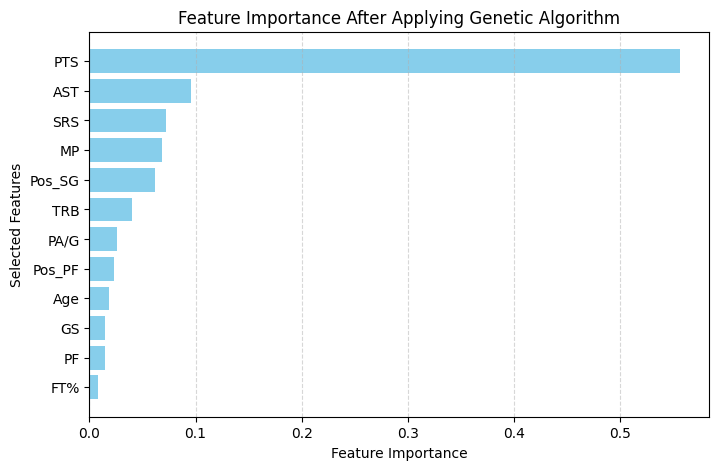

In [268]:
# Get the feature importances from the final model (after applying the genetic algorithm)
feature_importances = final_model.feature_importances_

# Create a DataFrame with feature names and their importances 
selected_feature_names = X_train_final.columns[selected_features]
importance_df = pd.DataFrame({
    "Feature": selected_feature_names,
    "Importance": feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Selected Features")
ax.set_title("Feature Importance After Applying Genetic Algorithm")
plt.gca().invert_yaxis() # Invert the y-axis for better readability
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

##### Model Evaluation (based on handling class imbalance datasets)
- Below are the evaluation metrics of the XGBoost Classifier model based on handling class imbalance datasets after applying the genetic algorithm:  
`AUC = 0.9905`  
`G-Mean = 0.9261`

In [269]:
# Evaluate the optimized model performance (for handling class imbalance dataset)
y_pred_final = final_model.predict(X_test_selected)
y_probs_final = final_model.predict_proba(X_test_selected)[:, 1]

# Compute AUC (AUC-ROC)
auc_score = roc_auc_score(y_test, y_probs_final)

# Compute G-Mean 
cm = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm.ravel()

# Sensitivity (Recall) and Specificity 
sensitivity = tp / (tp + fn)    # Recall / True Positive Rate (TPR)
specificity = tn / (tn + fp)    # True Negative Rate (TNR)

# G-Mean Calculation
g_mean = np.sqrt(sensitivity * specificity)

# Display AUC and G-Mean Results
print("\nModel Evaluation (after applying the genetic algorithm)")
print(f"AUC: {auc_score:.4f}")
print(f"G-Mean: {g_mean:.4f}")


Model Evaluation (after applying the genetic algorithm)
AUC: 0.9905
G-Mean: 0.9261


##### Model Evaluation (based on predicting the NBA MVP)
- Below are the evaluation metrics of the XGBoost Classifier model based on predicting the NBA MVP after applying the genetic algorithm:  
`Accuracy = 0.9768`  
`F1-Score = 0.7074`  
`Precision = 0.5938`  
`Recall = 0.8750`  
`AUC-ROC = 0.9276`

In [270]:
# Make predictions
y_pred_final = final_model.predict(X_test_selected)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
auc_roc = roc_auc_score(y_test, y_pred_final)

print("\nModel Evaluation (after applying the genetic algorithm)")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Model Evaluation (after applying the genetic algorithm)
Accuracy: 0.9768
F1-Score: 0.7074
Precision: 0.5938
Recall: 0.8750
AUC-ROC: 0.9276
